# AC - Data Analysis

After joining all the different data from the several csv files, it is time to analyse and put into charts all the different info we have access to, in order to understand what kind of data we have in our hands.

Let's start by importing all the necessary libraries and the document with all the static data, as well as the document with the dataset ready for predictions, in other words, the loan data. 

** VERY IMPORTANT: The static data, as we call it, is the data regarding the "Disponent" relation. We put all that data together resulting in a dataset comprising all the data from the client-account-district relation or the disponent relation, which allows us to take a closer look at the data and it's relations with each other. This way we can analyse the data from another point of view, not just the predictions point of view. **

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

static_dataset = pd.read_csv("disp_cli_acc_dist.csv")
loan_dataset = pd.read_csv("final_train.csv")

### Static Data

Let's start by checking the general stats of this dataset, such as number of columns, rows, data types, etc.

In [2]:
print("Number of rows: ", len(static_dataset.index))

print("Number of columns: ", len(static_dataset.columns))

Number of rows:  5369
Number of columns:  40


Let's take a closer look at the dataset's format and content, as well as some general statistics.

In [3]:
static_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 40 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Unnamed: 0                                                         5369 non-null   int64  
 1   disp_id                                                            5369 non-null   int64  
 2   client_id                                                          5369 non-null   int64  
 3   account_id                                                         5369 non-null   int64  
 4   type                                                               5369 non-null   object 
 5   birth_number                                                       5369 non-null   int64  
 6   client_district_id                                                 5369 non-null   int64  
 7   client_district_name    

In the output from the blocks below, some interesting statictical data can be seen. Namely, some of this data can be highlighted:

- the average of the columns regarding the district information of both the clients and the accounts have slight deviation, suggesting only small differences between the district associated with the client and the account. In other words, the district is in most cases the same for the client and the account, being that there is only a little number of cases in which it is different.

- The average salary of the account's districts is higher than the client's districts average salary, suggesting that clients prefer to open their accounts in districts with a higher income.

- The average of nº of municipalities with more than 10000 inhabitants is higher in the account districts than in the client districts, suggesting that clients prefer to have their accounts in districts with a higher population than the ones they live in (city centers, etc). This fact is backed up later in the data distribution charts.

- The average unemployment rate is slightly lower in the account's districts than in the client's districts indicating some sort of tendency towards richer and safer environments for the accounts to be associated with.

- However, somewhat contradicting the sentence before, the average number of enterpreneurs is higher in the account's districts than in the client's districts, leading to some sort of uncertainty on that side. This might be a factor that can impact negatively the loans' results.

- Moreover, the average number of commited crimes is higher in the account's districts than in the client's districts. This factor can only affect the loans results slightly but it is something that is usually associated with high levels of unemployment, which doesn't seem to be the case in this dataset.

In [4]:
static_dataset[['disp_id', 'client_id', 'account_id', 'birth_number', 'client_district_id', 'client_district_no. of inhabitants', 'client_district_no. of municipalities with inhabitants < 499', 'client_district_no. of municipalities with inhabitants 500-1999', 'client_district_no. of municipalities with inhabitants 2000-9999', 'client_district_no. of municipalities with inhabitants >10000', 'client_district_no. of cities']].describe()

,disp_id,client_id,account_id,birth_number,client_district_id,client_district_no. of inhabitants,client_district_no. of municipalities with inhabitants < 499,client_district_no. of municipalities with inhabitants 500-1999,client_district_no. of municipalities with inhabitants 2000-9999,client_district_no. of municipalities with inhabitants >10000,client_district_no. of cities
count,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5.369000e+03,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000
mean,3337.097970,3359.011920,2767.496927,535114.970013,37.310114,2.692806e+05,39.630844,20.739616,5.483144,1.709071,5.517974
std,2770.418826,2832.911984,2307.843630,172895.618429,25.043690,3.590500e+05,34.462701,15.190457,4.369373,1.075535,2.940686
min,1.000000,1.000000,1.000000,110820.000000,1.000000,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1418.000000,1418.000000,1178.000000,406009.000000,14.000000,8.888400e+04,8.000000,10.000000,2.000000,1.000000,4.000000
50%,2839.000000,2839.000000,2349.000000,540829.000000,38.000000,1.219470e+05,34.000000,21.000000,5.000000,1.000000,6.000000
75%,4257.000000,4257.000000,3526.000000,681013.000000,60.000000,2.261220e+05,65.000000,30.000000,7.000000,2.000000,8.000000
max,13690.000000,13998.000000,11382.000000,875927.000000,77.000000,1.204953e+06,151.000000,70.000000,20.000000,5.000000,11.000000


In [5]:
static_dataset[['client_district_ratio of urban inhabitants','client_district_average salary', 'client_district_unemploymant rate \'95','client_district_unemploymant rate \'96','client_district_no. of enterpreneurs per 1000 inhabitants', 'client_district_no. of commited crimes \'95','client_district_no. of commited crimes \'96']].describe()

,client_district_ratio of urban inhabitants,client_district_average salary,client_district_unemploymant rate '95,client_district_unemploymant rate '96,client_district_no. of enterpreneurs per 1000 inhabitants,client_district_no. of commited crimes '95,client_district_no. of commited crimes '96
count,5369.000000,5369.000000,5308.000000,5369.000000,5369.000000,5308.000000,5369.000000
mean,69.240045,9510.758614,2.865398,3.490942,121.191097,14818.629616,16352.240082
std,19.896870,1330.686689,1.847752,2.134924,23.106521,27094.330501,31330.146616
min,33.900000,8110.000000,0.290000,0.430000,81.000000,818.000000,888.000000
25%,52.700000,8547.000000,1.510000,1.960000,105.000000,2166.000000,2252.000000
50%,63.100000,8980.000000,2.710000,3.470000,116.000000,3729.000000,3839.000000
75%,85.600000,9897.000000,3.850000,4.790000,131.000000,6949.000000,6295.000000
max,100.000000,12541.000000,7.340000,9.400000,167.000000,85677.000000,99107.000000


In [6]:
static_dataset[['account_district_id', 'date', 'account_district_no. of inhabitants', 'account_district_no. of municipalities with inhabitants < 499', 'account_district_no. of municipalities with inhabitants 500-1999', 'account_district_no. of municipalities with inhabitants 2000-9999', 'account_district_no. of municipalities with inhabitants >10000', 'account_district_no. of cities']].describe()

,account_district_id,date,account_district_no. of inhabitants,account_district_no. of municipalities with inhabitants < 499,account_district_no. of municipalities with inhabitants 500-1999,account_district_no. of municipalities with inhabitants 2000-9999,account_district_no. of municipalities with inhabitants >10000,account_district_no. of cities
count,5369.000000,5369.000000,5.369000e+03,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000
mean,37.296703,951600.734960,2.711950e+05,39.407897,20.897374,5.515366,1.720805,5.516111
std,25.155235,14922.683647,3.605495e+05,34.290870,15.292543,4.402339,1.082003,2.919015
min,1.000000,930101.000000,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000
25%,14.000000,931219.000000,8.888400e+04,8.000000,10.000000,2.000000,1.000000,4.000000
50%,38.000000,960103.000000,1.219470e+05,34.000000,21.000000,5.000000,1.000000,6.000000
75%,60.000000,961103.000000,2.261220e+05,65.000000,30.000000,7.000000,2.000000,7.000000
max,77.000000,971229.000000,1.204953e+06,151.000000,70.000000,20.000000,5.000000,11.000000


In [7]:
static_dataset[['account_district_ratio of urban inhabitants','account_district_average salary', 'account_district_unemploymant rate \'95','account_district_unemploymant rate \'96','account_district_no. of enterpreneurs per 1000 inhabitants', 'account_district_no. of commited crimes \'95','account_district_no. of commited crimes \'96']].describe()

,account_district_ratio of urban inhabitants,account_district_average salary,account_district_unemploymant rate '95,account_district_unemploymant rate '96,account_district_no. of enterpreneurs per 1000 inhabitants,account_district_no. of commited crimes '95,account_district_no. of commited crimes '96
count,5369.000000,5369.000000,5312.000000,5369.000000,5369.000000,5312.000000,5369.000000
mean,69.288750,9519.221643,2.867705,3.489078,121.235053,14919.717244,16483.837772
std,19.831079,1332.240589,1.848996,2.131257,23.218265,27213.571846,31481.793856
min,33.900000,8110.000000,0.290000,0.430000,81.000000,818.000000,888.000000
25%,52.700000,8547.000000,1.510000,1.960000,105.000000,2166.000000,2305.000000
50%,63.100000,8991.000000,2.770000,3.470000,116.000000,3736.000000,3868.000000
75%,85.600000,9897.000000,3.850000,4.790000,132.000000,6604.000000,6295.000000
max,100.000000,12541.000000,7.340000,9.400000,167.000000,85677.000000,99107.000000


In order to evaluate better the column datatypes, it is important to guarantee that all missing values are replaced as to keep the data type integrity of the columns. These missing values were replaces by the avarage value of the column, as to not disturb any predictions. Last but not least, let's verify the type integrity and the data types present in this dataset.

In [8]:
print(static_dataset.dtypes)

Unnamed: 0                                                             int64
disp_id                                                                int64
client_id                                                              int64
account_id                                                             int64
type                                                                  object
birth_number                                                           int64
client_district_id                                                     int64
client_district_name                                                  object
client_district_region                                                object
client_district_no. of inhabitants                                     int64
client_district_no. of municipalities with inhabitants < 499           int64
client_district_no. of municipalities with inhabitants 500-1999        int64
client_district_no. of municipalities with inhabitants 2000-9999       int64

### Loan Data 

As before, let's start with general stats of the loan dataset used to train our models. As it can be seen below, it is much smaller than the static dataset analysed before, as it only contains part of the disponent relations that are indeed connected to a loan request. It does contain more information per row, of course, as it adds a whole more significant data about the loan request.

In [9]:
print("Number of rows: ", len(loan_dataset.index))

print("Number of columns: ", len(loan_dataset.columns))

Number of rows:  328
Number of columns:  45


Now, let's look at some general information about the dataset's shape and types.

In [10]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 45 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   loan_id                                                            328 non-null    int64  
 1   date_loan                                                          328 non-null    int64  
 2   amount                                                             328 non-null    int64  
 3   duration                                                           328 non-null    int64  
 4   payments                                                           328 non-null    int64  
 5   status                                                             328 non-null    int64  
 6   frequency                                                          328 non-null    object 
 7   date_account              

In the output from the blocks below, we can find some statistics about the loan dataset. Namely, some of this data can be highlighted:
- The average ammount requested in loans is 145308€ which is a pretty common value for loan requests and the max ammount of the loan requests is 538500€.
- The average duration of the loan is of approximately 36 months
- The average payment value is of approximately 4150€ with a standard deviation of 2193€.
- The status column, telling us information about the payment status of the loan has an average of 0.71, which means that the big majority of loan requests are being paid/are totally paid.
- As the transaction data was all gathered in the "balance" related columns and the "reached_negative_balance" column, it is interesting to notice that most of the client's that performed a loan request have in some point reached negative balance in their accounts. The average value of the 'reached negative balance' column is of 0.92, being that this column only has -1 and 1 as values.
- The average of the balance mean of clients is of 43292€, suggesting that the overall account balance is already pretty high in most of the clients.
- The minimum balance ammount registered is of -3424€ and the maximum balance ammount registeres is of 193909€. There is a huge gap between these two values. Looking into the average of minimum balance and maximum balance respectively, we get 630€ and 88496€, tightening the gap a lot more and giving us a better picture of the most common account balances.
- The standard deviation of the balance is about 7359€

In [11]:
loan_dataset[['amount', 'duration', 'payments', 'status', 'client_district_no. of inhabitants', 'client_district_no. of municipalities with inhabitants < 499', 'client_district_no. of municipalities with inhabitants 500-1999', 'client_district_no. of municipalities with inhabitants 2000-9999', 'client_district_no. of municipalities with inhabitants >10000', 'client_district_no. of cities']].describe()

,amount,duration,payments,status,client_district_no. of inhabitants,client_district_no. of municipalities with inhabitants < 499,client_district_no. of municipalities with inhabitants 500-1999,client_district_no. of municipalities with inhabitants 2000-9999,client_district_no. of municipalities with inhabitants >10000,client_district_no. of cities
count,328.000000,328.000000,328.000000,328.000000,3.280000e+02,328.000000,328.000000,328.000000,328.000000,328.000000
mean,145308.621951,35.853659,4150.932927,0.719512,2.717811e+05,40.439024,22.042683,5.615854,1.673780,5.301829
std,105247.318098,16.734752,2193.620989,0.695541,3.608927e+05,34.820061,16.390439,4.497229,1.092222,2.865549
min,4980.000000,12.000000,319.000000,-1.000000,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000
25%,68328.000000,24.000000,2368.750000,1.000000,8.888400e+04,8.000000,10.000000,3.000000,1.000000,4.000000
50%,114804.000000,36.000000,3878.500000,1.000000,1.236040e+05,34.000000,22.000000,5.000000,1.000000,5.000000
75%,198600.000000,48.000000,5907.750000,1.000000,2.261220e+05,63.500000,35.250000,8.000000,2.000000,7.000000
max,538500.000000,60.000000,9689.000000,1.000000,1.204953e+06,151.000000,70.000000,20.000000,5.000000,11.000000


In [12]:
loan_dataset[['client_district_ratio of urban inhabitants','client_district_average salary', 'client_district_unemploymant rate \'95','client_district_unemploymant rate \'96','client_district_no. of enterpreneurs per 1000 inhabitants', 'client_district_no. of commited crimes \'95','client_district_no. of commited crimes \'96']].describe()

,client_district_ratio of urban inhabitants,client_district_average salary,client_district_unemploymant rate '95,client_district_unemploymant rate '96,client_district_no. of enterpreneurs per 1000 inhabitants,client_district_no. of commited crimes '95,client_district_no. of commited crimes '96
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,67.923780,9523.149390,2.883378,3.522622,121.442073,14762.966303,16436.670732
std,20.264335,1319.525148,1.898547,2.200078,23.279639,27152.988590,31548.930759
min,33.900000,8110.000000,0.290000,0.430000,81.000000,818.000000,888.000000
25%,52.700000,8546.250000,1.510000,1.960000,107.000000,2159.000000,2252.000000
50%,61.900000,8994.000000,2.770000,3.490000,115.000000,3659.000000,3651.000000
75%,85.525000,9897.000000,3.835000,4.790000,135.000000,6949.000000,6872.000000
max,100.000000,12541.000000,7.340000,9.400000,167.000000,85677.000000,99107.000000


In [13]:
loan_dataset[['account_district_no. of inhabitants', 'account_district_no. of municipalities with inhabitants < 499', 'account_district_no. of municipalities with inhabitants 500-1999', 'account_district_no. of municipalities with inhabitants 2000-9999', 'account_district_no. of municipalities with inhabitants >10000', 'account_district_no. of cities']].describe()

,account_district_no. of inhabitants,account_district_no. of municipalities with inhabitants < 499,account_district_no. of municipalities with inhabitants 500-1999,account_district_no. of municipalities with inhabitants 2000-9999,account_district_no. of municipalities with inhabitants >10000,account_district_no. of cities
count,3.280000e+02,328.000000,328.000000,328.000000,328.000000,328.000000
mean,2.888467e+05,39.240854,21.698171,5.432927,1.649390,5.219512
std,3.779662e+05,34.850137,16.369876,4.441438,1.070425,2.886325
min,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9.208400e+04,5.000000,7.000000,2.000000,1.000000,4.000000
50%,1.252360e+05,34.000000,23.000000,5.000000,1.000000,5.000000
75%,2.268035e+05,63.000000,35.000000,8.000000,2.000000,7.000000
max,1.204953e+06,151.000000,70.000000,20.000000,5.000000,11.000000


In [14]:
loan_dataset[['account_district_ratio of urban inhabitants','account_district_average salary', 'account_district_unemploymant rate \'95','account_district_unemploymant rate \'96','account_district_no. of enterpreneurs per 1000 inhabitants', 'account_district_no. of commited crimes \'95','account_district_no. of commited crimes \'96']].describe()

,account_district_ratio of urban inhabitants,account_district_average salary,account_district_unemploymant rate '95,account_district_unemploymant rate '96,account_district_no. of enterpreneurs per 1000 inhabitants,account_district_no. of commited crimes '95,account_district_no. of commited crimes '96
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,68.649390,9593.338415,2.853348,3.474451,122.759146,16089.271181,17974.329268
std,20.573455,1359.232577,1.933274,2.211972,23.951657,28447.842009,33065.392486
min,33.900000,8110.000000,0.290000,0.430000,81.000000,818.000000,888.000000
25%,53.000000,8552.250000,1.420000,1.860000,107.000000,2166.000000,2291.750000
50%,62.000000,9019.500000,2.770000,3.490000,115.500000,3807.000000,3891.000000
75%,88.250000,9951.250000,3.850000,4.790000,140.000000,9672.000000,9208.000000
max,100.000000,12541.000000,7.340000,9.400000,167.000000,85677.000000,99107.000000


In [15]:
loan_dataset[['balance_mean', 'balance_max', 'balance_min', 'balance_std', 'reached_negative_balance']].describe()

,balance_mean,balance_max,balance_min,balance_std,reached_negative_balance
count,328.000000,328.000000,328.000000,328.000000,328.000000
mean,43292.897145,88496.975305,630.187500,18252.081121,0.920732
std,13280.435504,34528.708477,1106.068371,7359.406050,0.390792
min,12250.000000,20100.000000,-3424.600000,5423.587577,-1.000000
25%,32592.166019,59579.150000,300.000000,11810.935935,1.000000
50%,42183.600179,82666.800000,600.000000,18556.828635,1.000000
75%,53012.584864,120181.750000,900.000000,24215.471913,1.000000
max,76232.700000,193909.900000,13097.700000,35314.527845,1.000000


Lastly, let's verify the types of data existent in this dataset.

In [16]:
print(loan_dataset.dtypes)

loan_id                                                                int64
date_loan                                                              int64
amount                                                                 int64
duration                                                               int64
payments                                                               int64
status                                                                 int64
frequency                                                             object
date_account                                                           int64
account_district_name                                                 object
account_district_region                                               object
account_district_no. of inhabitants                                    int64
account_district_no. of municipalities with inhabitants < 499          int64
account_district_no. of municipalities with inhabitants 500-1999       int64

## Data Distribution - Static Data

Let's start by analyzing the data distribution in the several columns regarding the static data (disponent relation or client-account relation). It makes sense to plot charts for each and every data attribute as to discover the various tendencies of this data when put together. 
The counters and ID don't have much distribuition analysis to do because these columns are mere increasing values with not much correlation to its variance. However the other columns might give us some insteresting data.

### Column 'Type'

As we can verify, most of this dataset is comprised of relations client-account of type 'Owner', so it is likely that most of the loans that we will be interested in analyzing will most likely have type 'Owner' associated with them.

<AxesSubplot:>

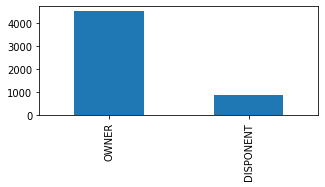

In [17]:
static_dataset['type'].value_counts().plot(kind='bar', figsize=(5, 2))

### Column "Birth Number"

TODO: get client distribution over birth years, the rest is irrelevant

### Column "Client District ID"

As we can see in the following chart, there is a clear tendency for client's to be associated with district with ID 1, being followed at large by district with ID 74, with a difference of almost 500 people. Besides this huge discrepancy between first and second place of this chart, the differences between the following positions are significantly smaller and there's a good distribuition of clients throughout the districts, stabilizing in about 35-65 clients per district in the big majority of the cases.

<AxesSubplot:>

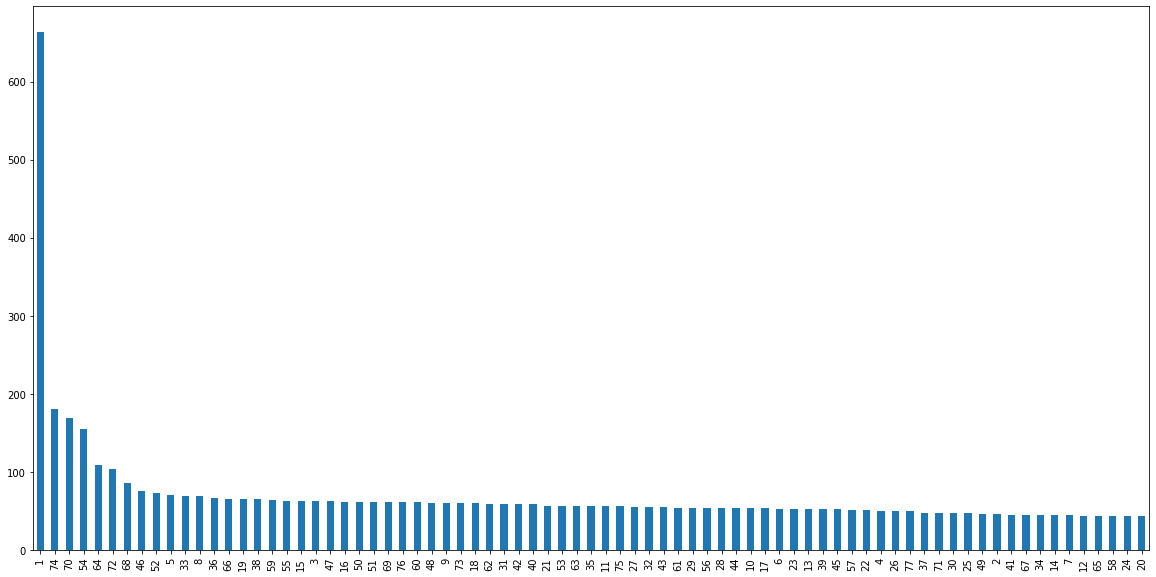

In [18]:
static_dataset['client_district_id'].value_counts().plot(kind='bar', figsize=(20, 10))

### Column "Account District ID"

Comparing to the chart above, we can see that the second and third districts (IDs 74 & 70), where most clients and accounts are associated to, switch with each other, making it clear that not all accounts are located in the same district as the client's. There is a clear tendency for clients and accounts to be located in district with ID 1, with over 600 occurences just in that district, followed by the second district (ID 70) which only has near to 200 occurences associated.

<AxesSubplot:>

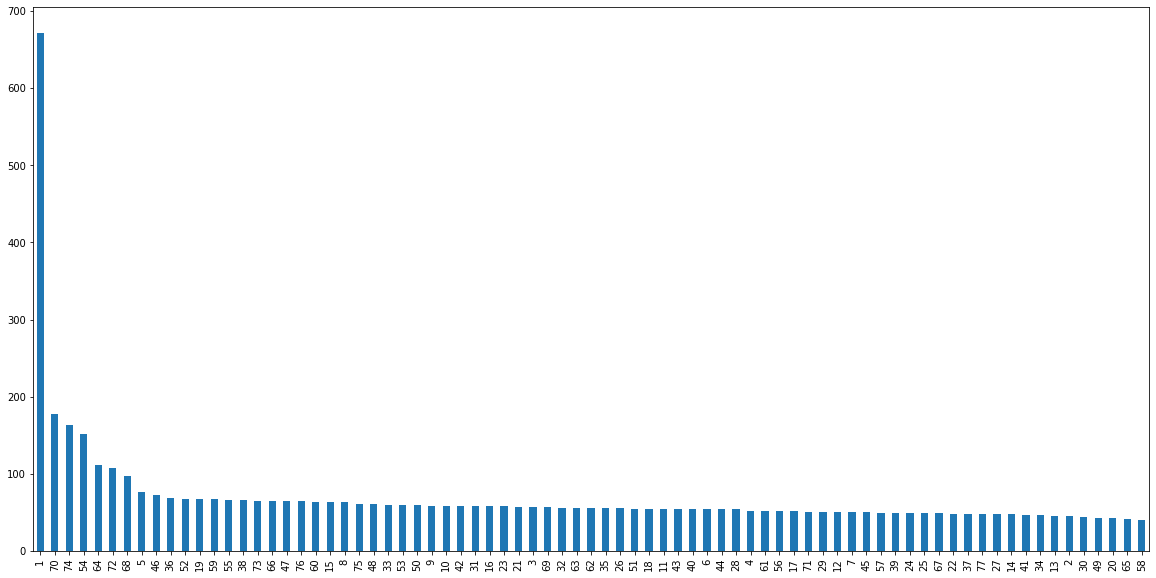

In [19]:
static_dataset['account_district_id'].value_counts().plot(
    kind='bar', figsize=(20, 10))


### Columns "Client District Name" & "Account District Name"

Since every District has an ID and Name associated to it, showing the graphs for the names would be esentially showing the same information, which is why we don't find it useful to plot that graph as it would be redundant.

### Column "Client District Region"

This chart shows that most of the clients are located in the South Moravia region, cloesely followed by North Moravia region. It will be compared with the account's district in the next section.

<AxesSubplot:>

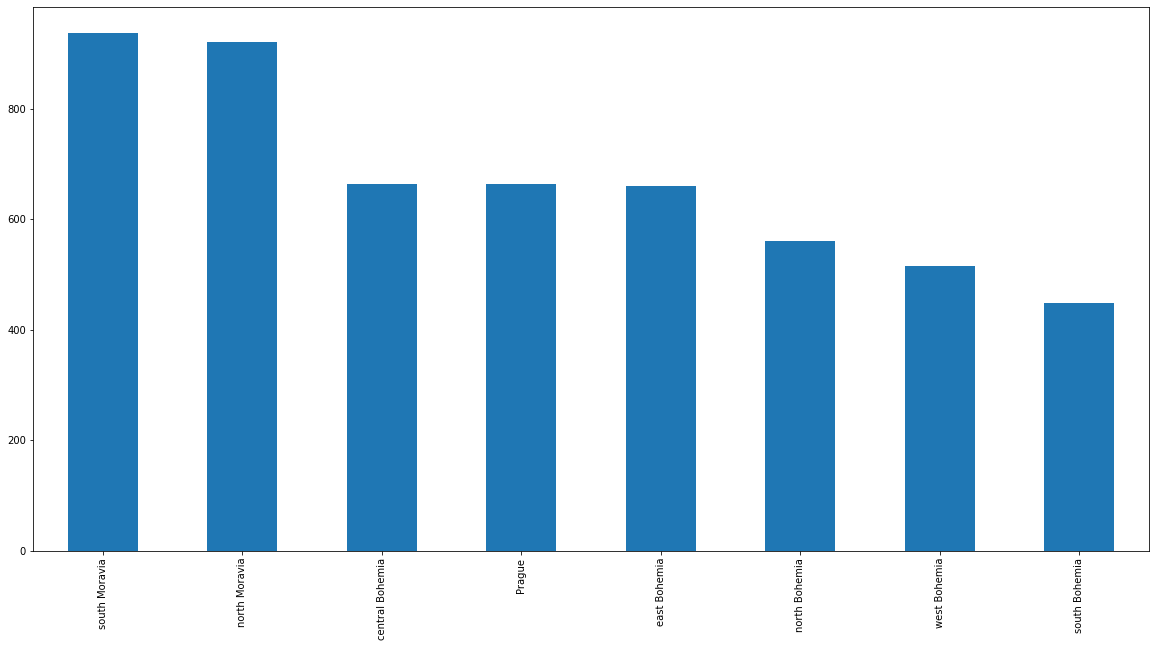

In [20]:
static_dataset['client_district_region'].value_counts().plot(
    kind='bar', figsize=(20, 10))


### Column "Account District Region"

As we can see in these two graphs showcasing the disctrict distribution of clients and accounts, it is important to analize the tendency for clients and accounts to be in the Moravia region, both north and south. However, the region with the most clients is South Moravia but the region with the most accounts is North Moravia, showing some tencendy for accounts to be placed in a different region, which can be because of many external factors, but maybe because those regions have bigger banking companies there. Prague region also goes up in this chart, supporting the previous statement, since this is the region of the capital.

<AxesSubplot:>

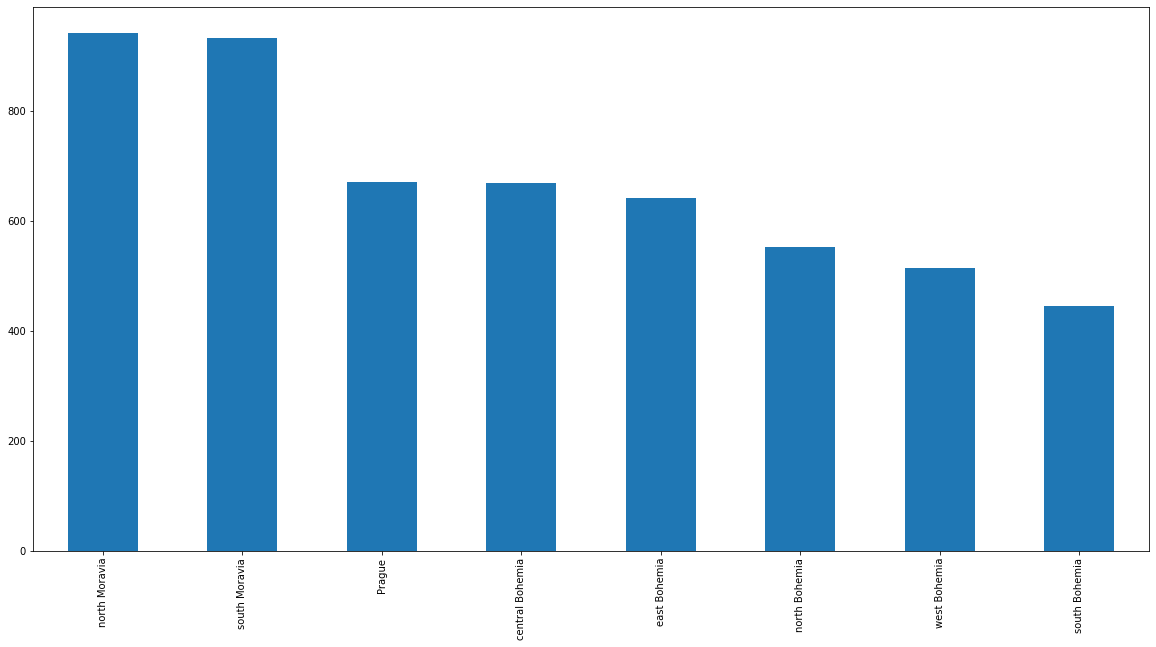

In [21]:
static_dataset['account_district_region'].value_counts().plot(
    kind='bar', figsize=(20, 10))

### Column "Client District No. of Inhabitants"

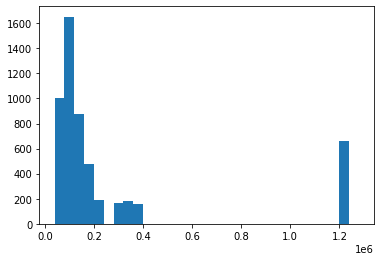

In [22]:
# static_dataset['client_district_no. of inhabitants'].value_counts().plot(
#     kind='bar', figsize=(20, 10))

plt.hist(static_dataset['client_district_no. of inhabitants'], bins=[40000, 80000, 120000, 160000, 200000, 240000, 280000, 320000, 360000, 400000, 440000, 480000,
         520000, 560000, 600000, 640000, 680000, 720000, 760000, 800000, 840000, 880000, 920000, 960000, 1000000, 1040000, 1080000, 1120000, 1160000, 1200000, 1240000, 1280000])
plt.show()


### Column "Account District No. of Inhabitants"

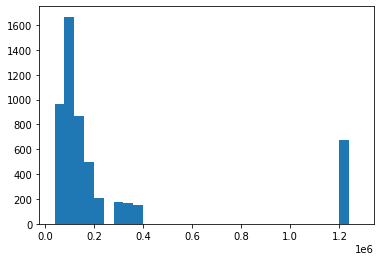

In [23]:
# static_dataset['account_district_no. of inhabitants'].value_counts().plot(
#     kind='bar', figsize=(20, 10))

plt.hist(static_dataset['account_district_no. of inhabitants'], bins=[40000, 80000, 120000, 160000, 200000, 240000, 280000, 320000, 360000, 400000, 440000, 480000,
         520000, 560000, 600000, 640000, 680000, 720000, 760000, 800000, 840000, 880000, 920000, 960000, 1000000, 1040000, 1080000, 1120000, 1160000, 1200000, 1240000, 1280000])
plt.show()


### Column "Client District Number of Municipalities with less than 499 inhabitants"

<AxesSubplot:>

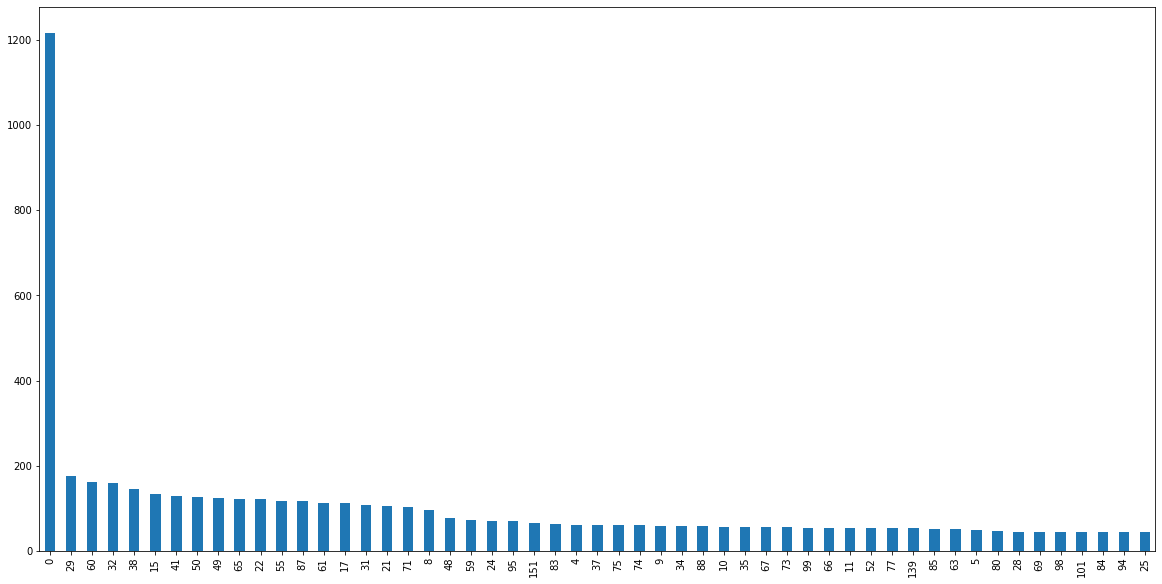

In [24]:
static_dataset['client_district_no. of municipalities with inhabitants < 499'].value_counts().plot(
    kind='bar', figsize=(20, 10))

    #FIXME: meter intervalos no x como no anterior


### Column "Account District Number of Municipalities with less than 499 inhabitants"

<AxesSubplot:>

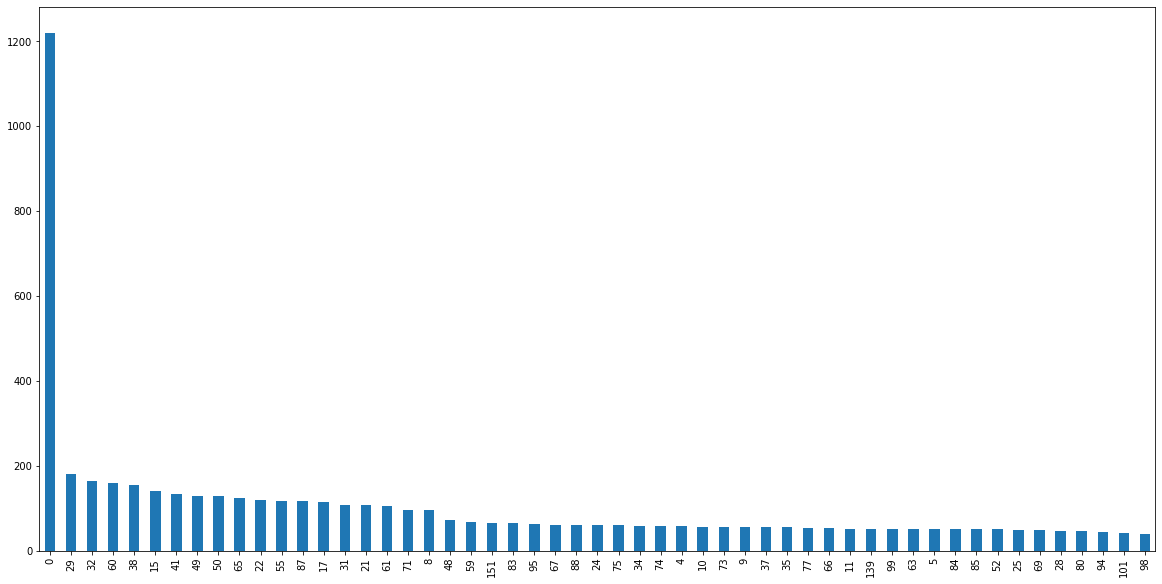

In [25]:
static_dataset['account_district_no. of municipalities with inhabitants < 499'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: meter intervalos no x como no anterior


### Column "Client District Number of Municipalities with number of inhabitants between 500 and 1999"

<AxesSubplot:>

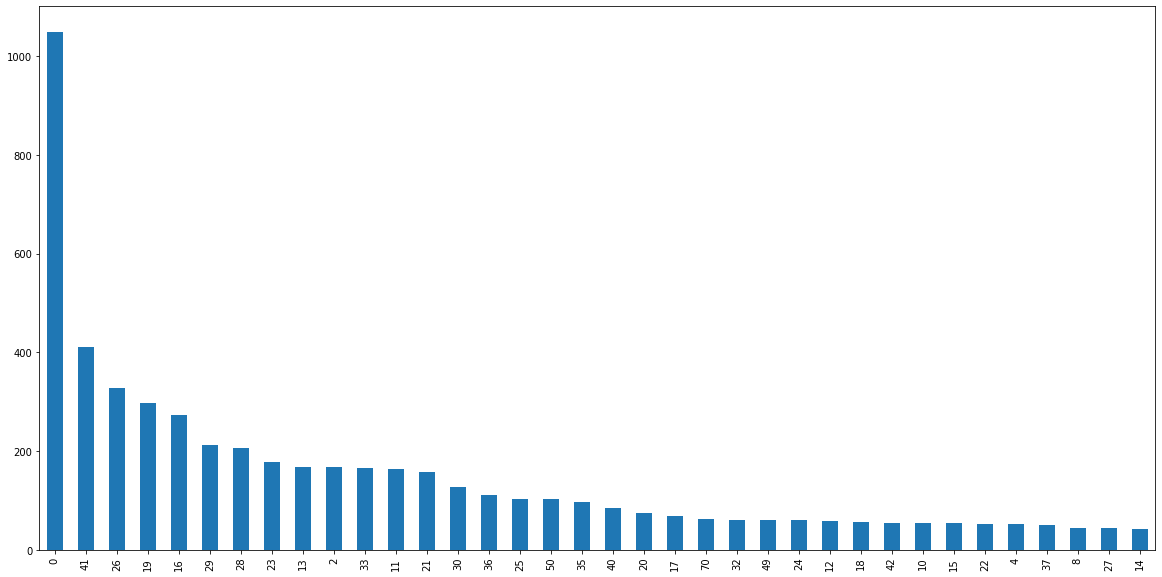

In [26]:
static_dataset['client_district_no. of municipalities with inhabitants 500-1999'].value_counts().plot(
    kind='bar', figsize=(20, 10))

    #FIXME: same as before


### Column "Account District Number of Municipalities with number of inhabitants between 500 and 1999"

<AxesSubplot:>

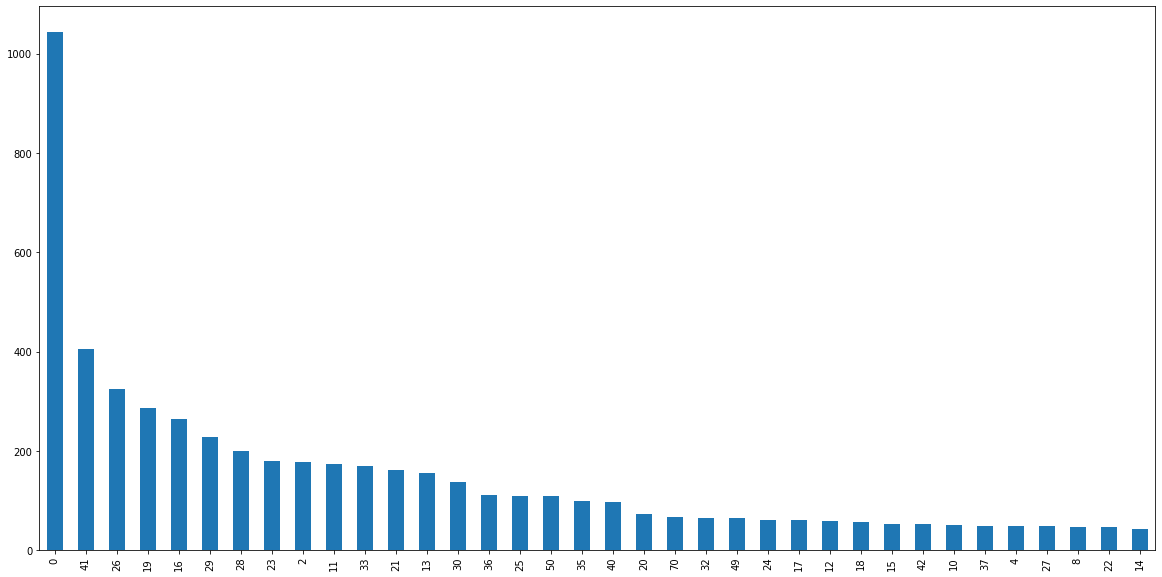

In [27]:
static_dataset['account_district_no. of municipalities with inhabitants 500-1999'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: same as before


### Column "Client District Number of Municipalities with number of inhabitants between 2000 and 9999"

<AxesSubplot:>

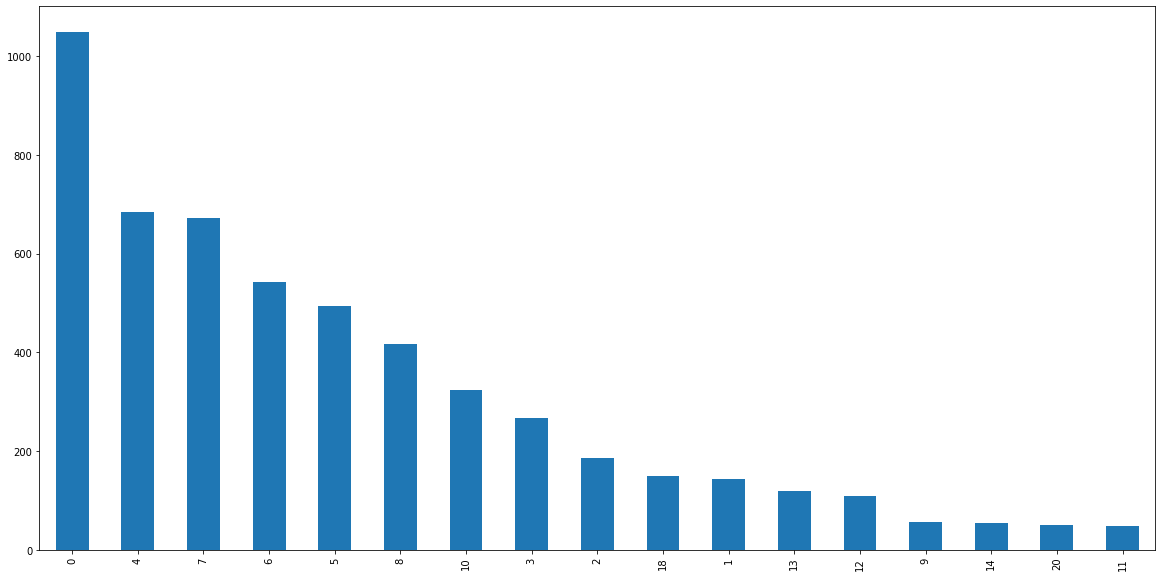

In [28]:
static_dataset['client_district_no. of municipalities with inhabitants 2000-9999'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: same as before

### Column "Account District Number of Municipalities with number of inhabitants between 2000 and 9999"

<AxesSubplot:>

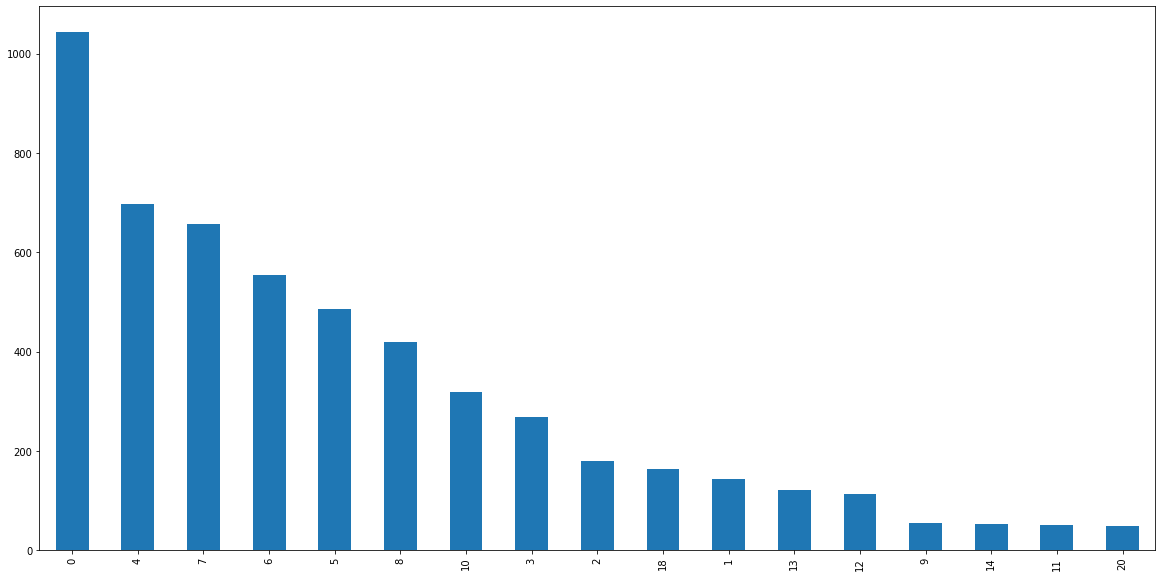

In [29]:
static_dataset['account_district_no. of municipalities with inhabitants 2000-9999'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: same as before

### Column "Client District Number of Municipalities with more than 10000 inhabitants"

<AxesSubplot:>

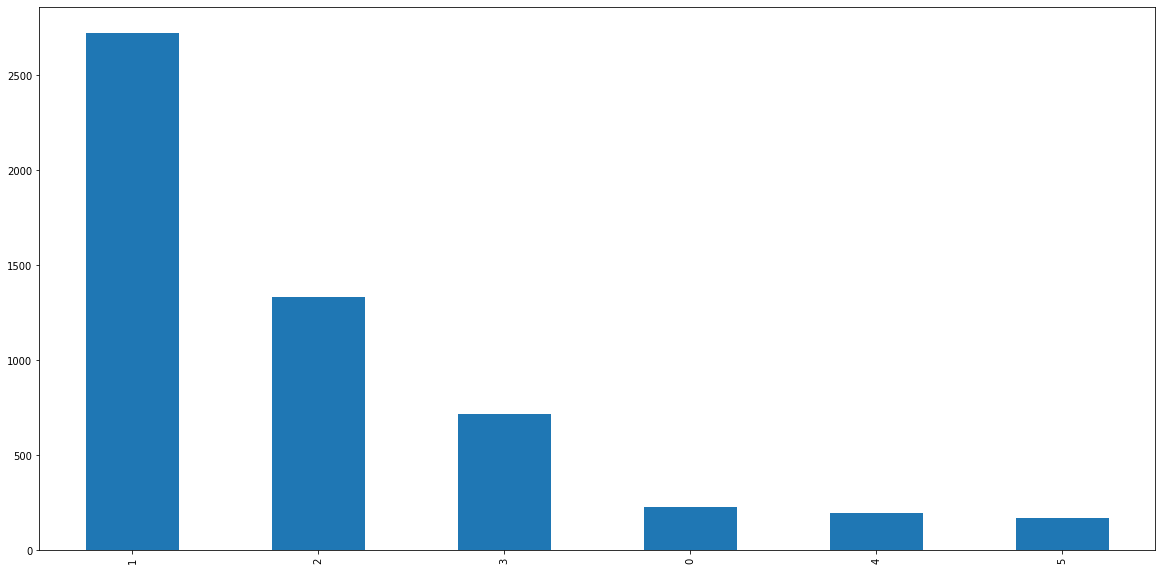

In [30]:
static_dataset['client_district_no. of municipalities with inhabitants >10000'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: same as before


### Column "Account District Number of Municipalities with more than 10000 inhabitants"

<AxesSubplot:>

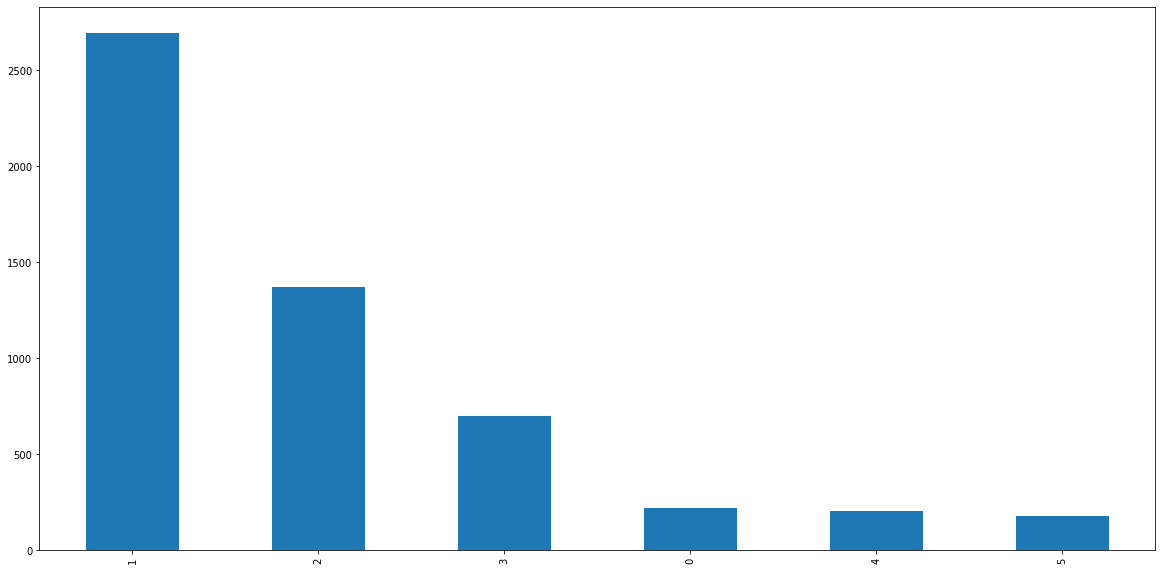

In [31]:
static_dataset['account_district_no. of municipalities with inhabitants >10000'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: same as before

### Column "Client District Number of Cities"

<AxesSubplot:>

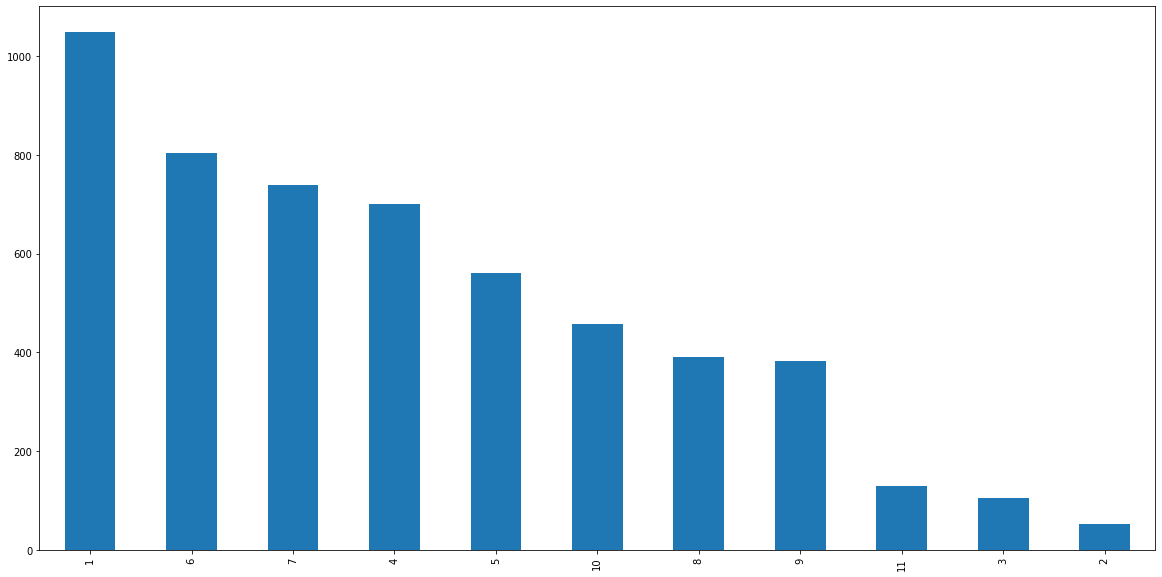

In [32]:
static_dataset['client_district_no. of cities'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME put names in axis, provide explanation to graph

### Column "Account District Number of Cities"

<AxesSubplot:>

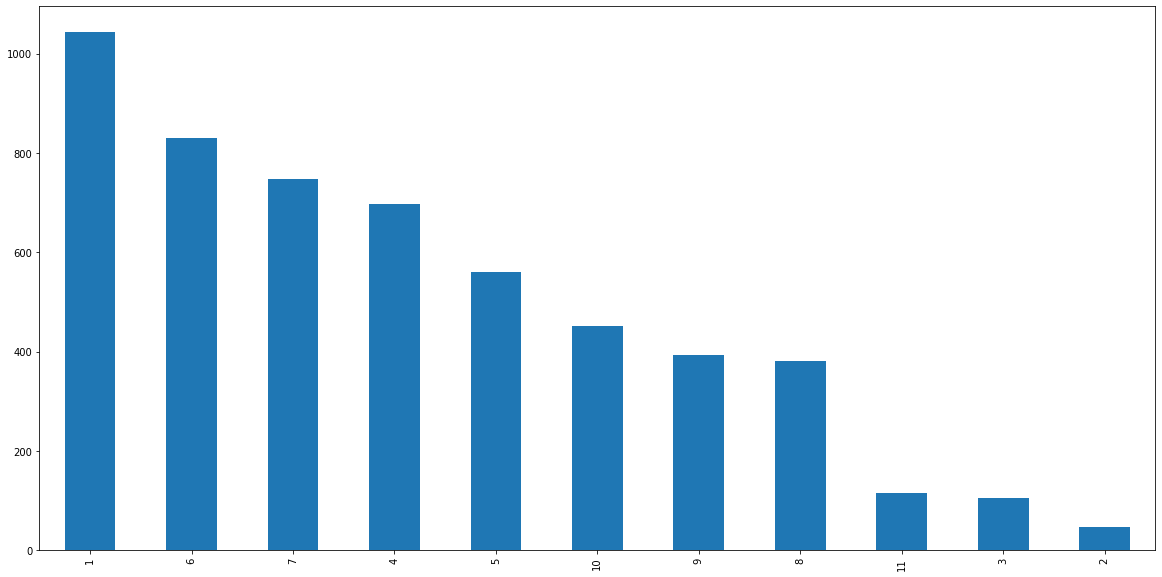

In [33]:
static_dataset['account_district_no. of cities'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME put names in axis, provide explanation to graph


### Column "Client District Ratio of Urban Inhabitants"

C:\Users\shit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='client_district_ratio of urban inhabitants', ylabel='Density'>

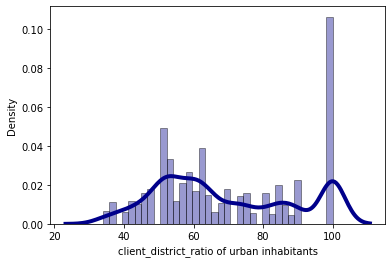

In [34]:
sns.distplot(static_dataset['client_district_ratio of urban inhabitants'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})


### Column "Account District Ratio of Urban Inhabitants"

C:\Users\shit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='account_district_ratio of urban inhabitants', ylabel='Density'>

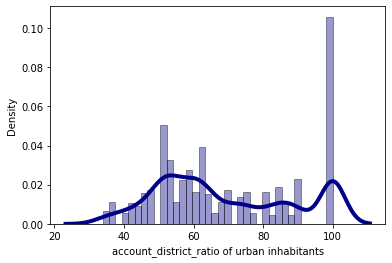

In [35]:
sns.distplot(static_dataset['account_district_ratio of urban inhabitants'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})


### Column "Client District Average Salary"

<AxesSubplot:>

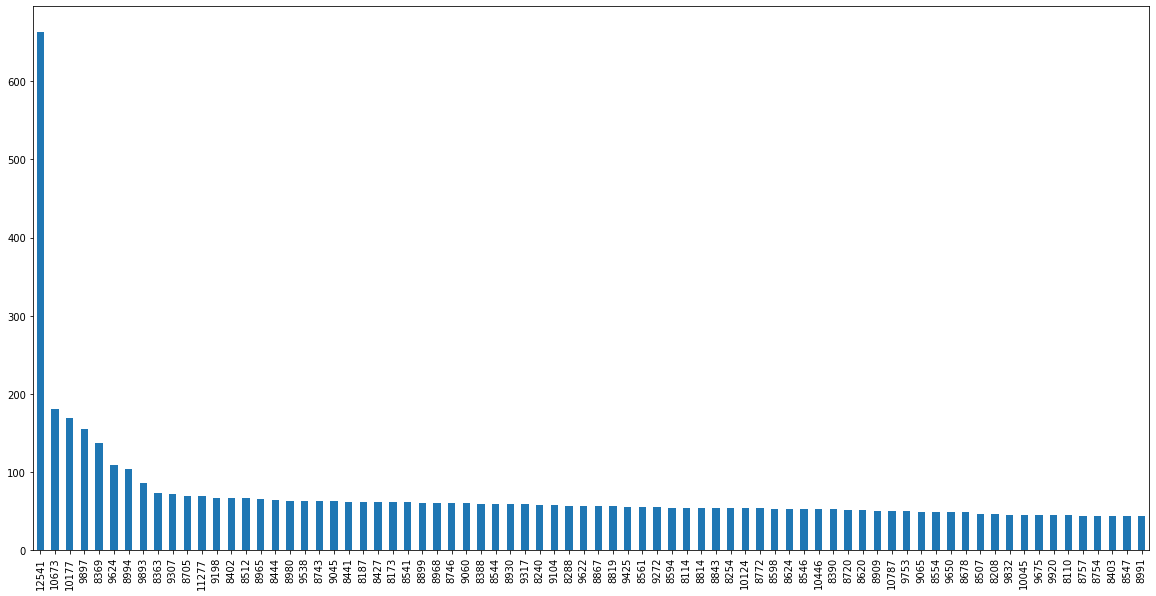

In [36]:
static_dataset['client_district_average salary'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: meter intervalos no x


### Column "Account District Average Salary"

<AxesSubplot:>

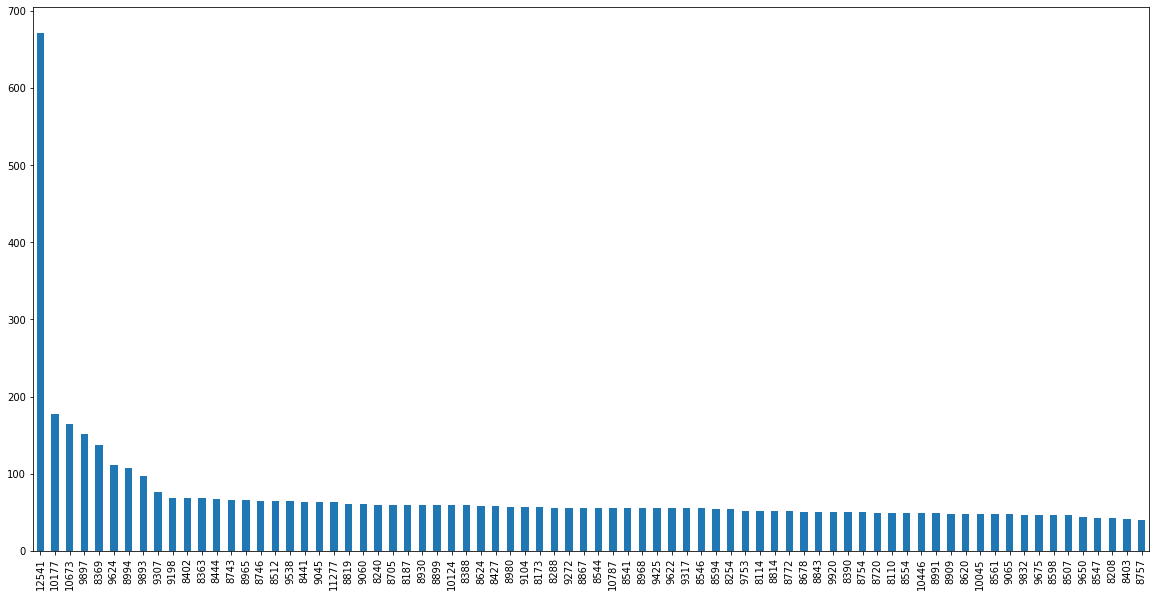

In [37]:
static_dataset['account_district_average salary'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: meter intervalos no x

### Column "Client District Unemployment Rate '95"

There is a clear tendency in the value 0.29, in other words, more clients live in districts whose unemployment rate in '95 was around 0.29. 

C:\Users\shit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="client_district_unemploymant rate '95", ylabel='Density'>

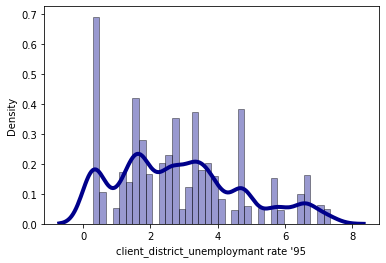

In [38]:
sns.distplot(static_dataset['client_district_unemploymant rate \'95'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})


### Column "Account District Unemployment Rate '95"

C:\Users\shit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="account_district_unemploymant rate '95", ylabel='Density'>

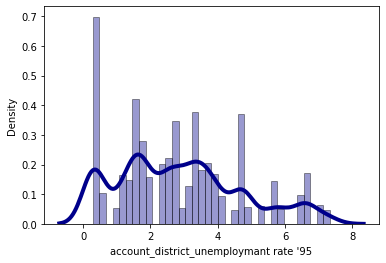

In [39]:
sns.distplot(static_dataset['account_district_unemploymant rate \'95'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

### Column "Client District Unemployment Rate '96"


C:\Users\shit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="client_district_unemploymant rate '96", ylabel='Density'>

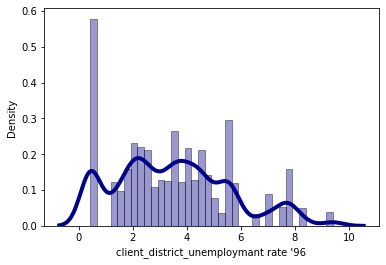

In [40]:
sns.distplot(static_dataset['client_district_unemploymant rate \'96'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

### Column "Account District Unemployment Rate '96"

C:\Users\shit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="account_district_unemploymant rate '96", ylabel='Density'>

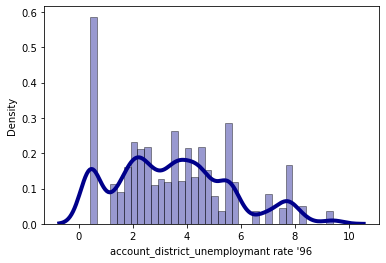

In [41]:
sns.distplot(static_dataset['account_district_unemploymant rate \'96'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

### Column "Client District Number of Enterpreneours per 1000 Inhabitants" 

<AxesSubplot:>

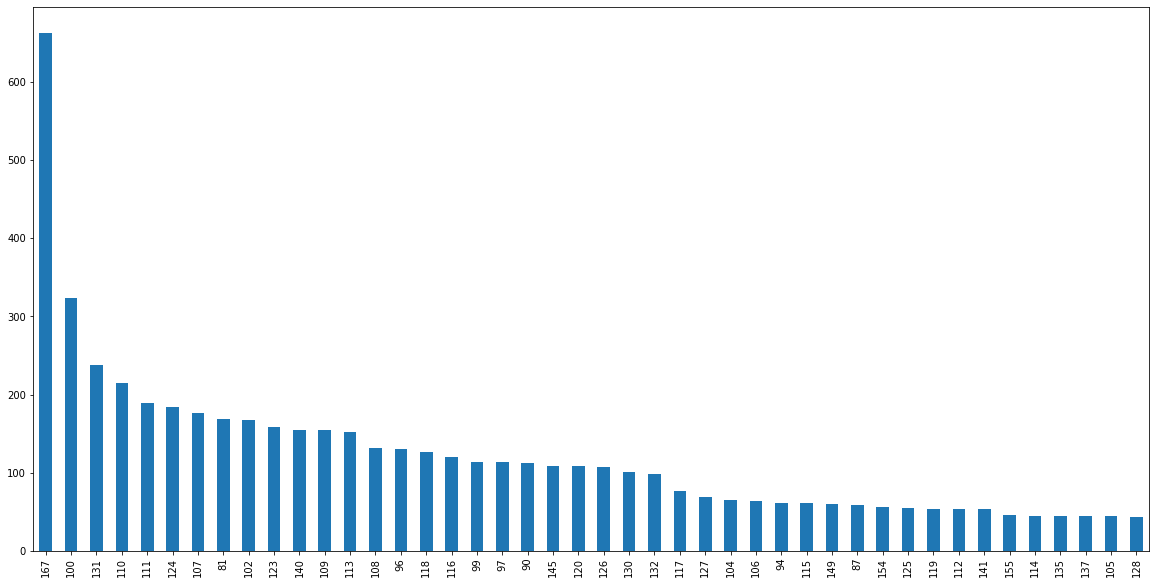

In [42]:
static_dataset['client_district_no. of enterpreneurs per 1000 inhabitants'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: you know the deal

### Column "Account District Number of Enterpreneours per 1000 Inhabitants" 

<AxesSubplot:>

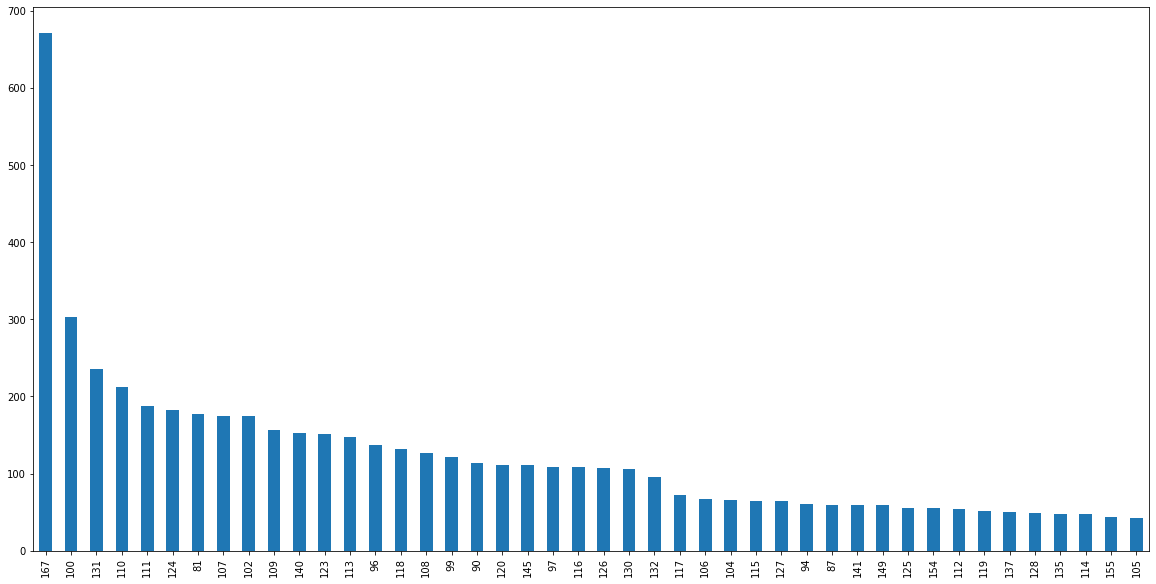

In [43]:
static_dataset['account_district_no. of enterpreneurs per 1000 inhabitants'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: you know the deal

### Column "Client District Number of Commited Crimes '95"

C:\Users\shit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="client_district_no. of commited crimes '95", ylabel='Density'>

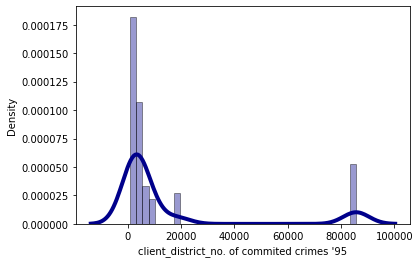

In [44]:
sns.distplot(static_dataset['client_district_no. of commited crimes \'95'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

#FIXME: this chart isn't right at all, find better way of showing the distribution of clients per district with number of commited crimes in 95

### Column "Account District Number of Commited Crimes '95"

C:\Users\shit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="account_district_no. of commited crimes '95", ylabel='Density'>

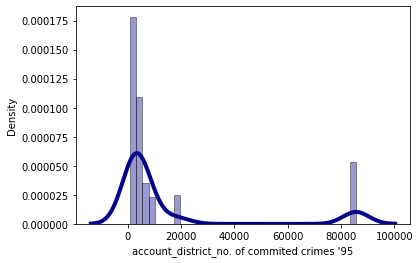

In [45]:
sns.distplot(static_dataset['account_district_no. of commited crimes \'95'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

#FIXME: this chart isn't right at all, find better way of showing the distribution of clients per district with number of commited crimes in 95

### Column "Client District Number of Commited Crimes '96"

C:\Users\shit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="client_district_no. of commited crimes '96", ylabel='Density'>

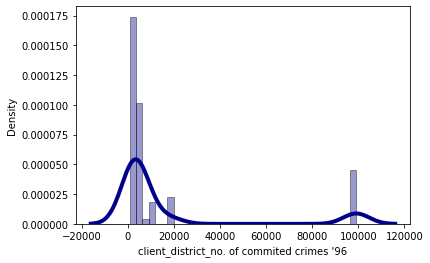

In [46]:
sns.distplot(static_dataset['client_district_no. of commited crimes \'96'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

#FIXME: this chart isn't right at all, find better way of showing the distribution of clients per district with number of commited crimes in 96 again uwu


### Column "Account District Number of Commited Crimes '96"

C:\Users\shit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="account_district_no. of commited crimes '96", ylabel='Density'>

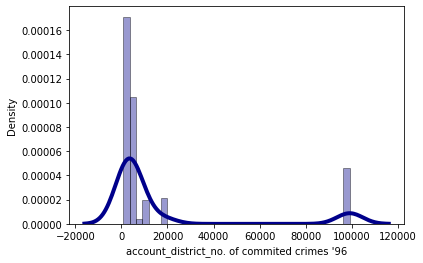

In [47]:
sns.distplot(static_dataset['account_district_no. of commited crimes \'96'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

#FIXME: this chart isn't right at all, find better way of showing the distribution of clients per district with number of commited crimes in 96 again uwu

### Column "Account Frequency"

<AxesSubplot:>

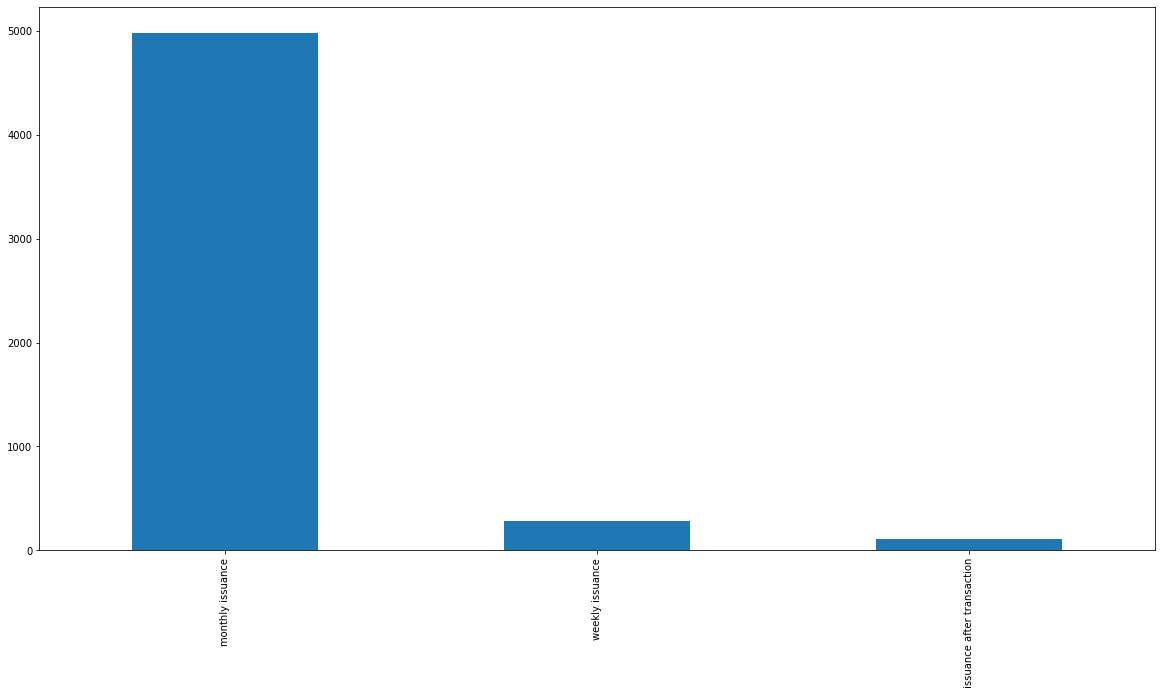

In [48]:
static_dataset['frequency'].value_counts().plot(
    kind='bar', figsize=(20, 10))

### Column "Account Date"

In [49]:
#TODO: get years of date and make graph with years

## Data Distribution - Loan Data

# TODO: data distribution for everything 

## Data Correlation

### Static Dataset

Some of these columns are highly correlated to each other, some patterns even existing between each other. A good way of checking this is by looking at the dataset heatmap and check which of the columns have a higher correlation rate. Some important takeaways from this chart are:

# TODO: study chart and state the most important correlations

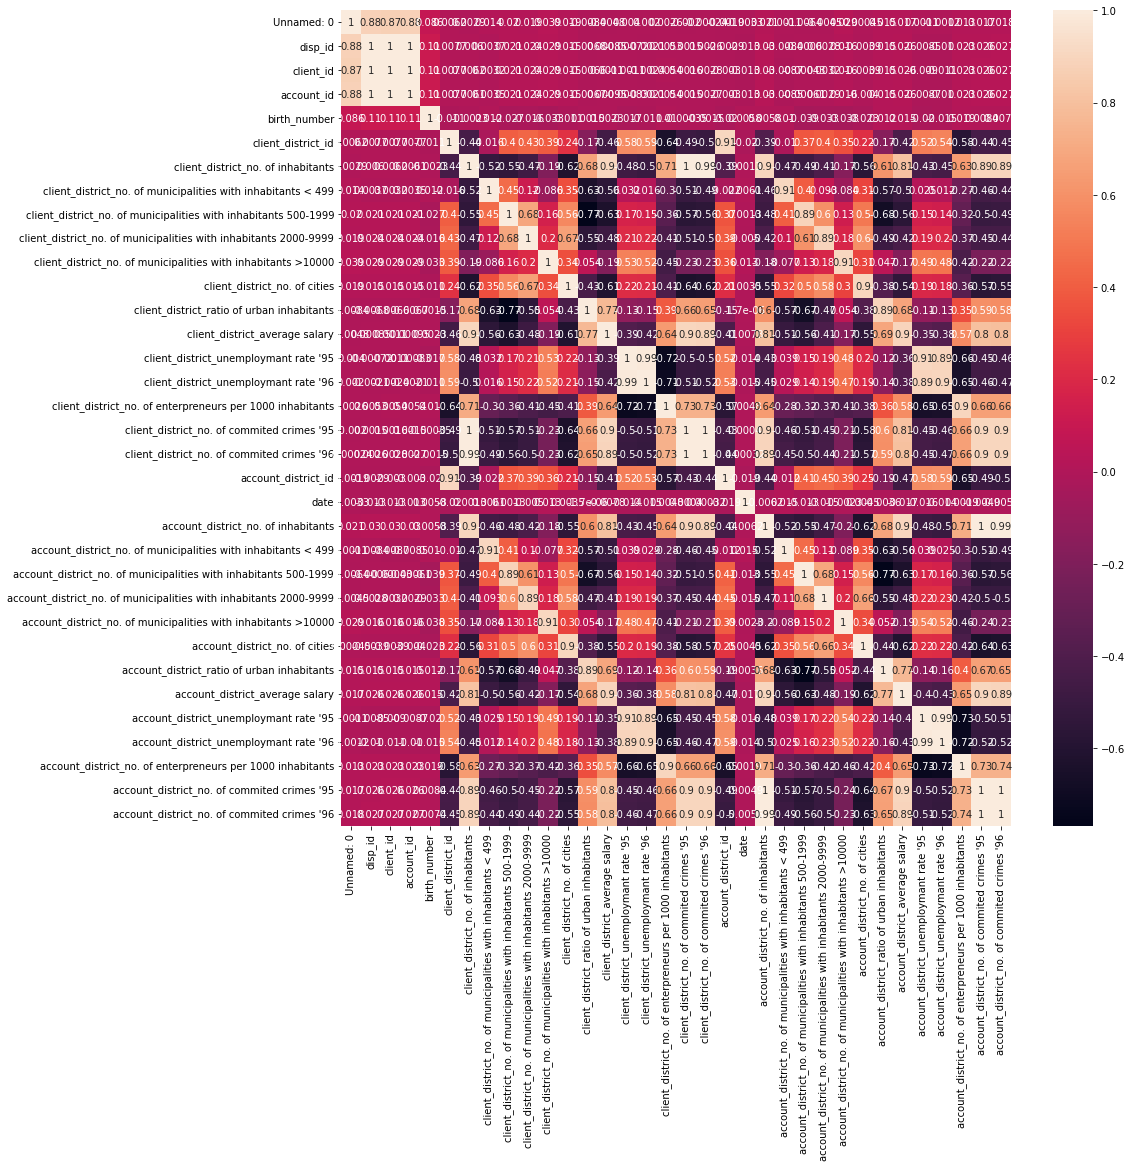

In [50]:
corrmat = static_dataset.corr()
f, ax = plt.subplots(figsize=(15, 15))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, square=False, annot=True)
plt.show()

### Loan Dataset 

# TODO: DATA COORELATION for LOAN DATASET

## Histograms

### Number of loans per region divided by gender

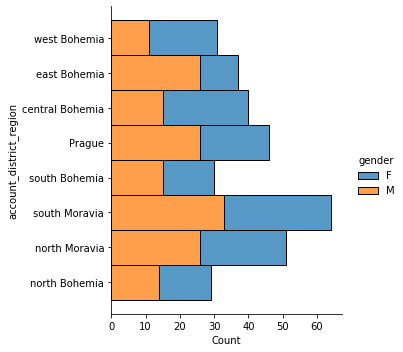

In [51]:
sns.displot(loan_dataset, y="account_district_region", hue="gender", multiple="stack") #TODO: Aumentar espaço no X

### Number of loans per frequency divided by status

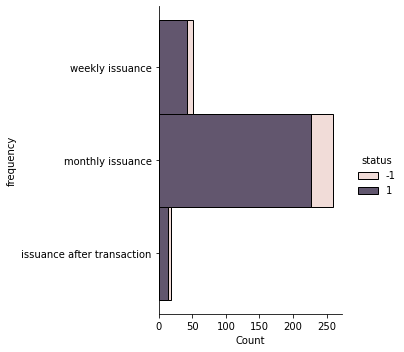

In [52]:
sns.displot(loan_dataset, y="frequency", hue="status", multiple="stack") #TODO: Aumentar espaço no X

## Scatter Plot
### Relates Amount with Payments

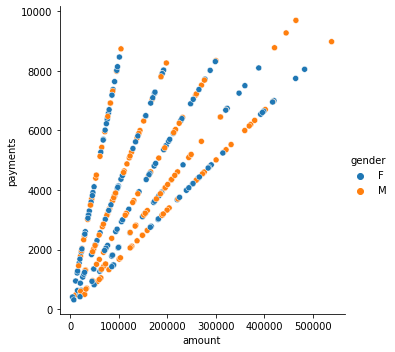

In [53]:
sns.relplot(x="amount", y="payments", hue="gender", data=loan_dataset)


### Relates account_balance with nº credits divided by gender

In [54]:
sns.relplot(x="balance_mean", y="credit_count",
            hue="gender", data=loan_dataset)

ValueError: Could not interpret value `credit_count` for parameter `y`

## Violin Plots
### Relates frequency with the payments done

In [ ]:
sns.catplot(x="frequency", y="payments",hue="gender",kind="violin", data=loan_dataset) # Pode-se tirar o gender

### Relates frequency with the loan amount

In [ ]:
sns.catplot(x="frequency", y="amount",hue="gender",kind="violin", data=loan_dataset) # Pode-se tirar o gender

## Categorical Scatter Plots
### Relates the amount of each loan to the duration

In [ ]:
sns.catplot(x="duration", y="amount", data=loan_dataset)


### Relates the amount of a loan with the fact that it was succesfull or not

In [ ]:
sns.catplot(x="status", y="amount", data=loan_dataset)
